In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
#import imutils

import qrcode

from pyzbar.pyzbar import decode #visual c 설치해야한다.
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

## Harris Corner

float32
(600, 868)
-0.0003435659
0.00012286342


(array([2.20000e+01, 7.90000e+01, 2.61000e+02, 6.02000e+02, 1.93400e+03,
        7.29300e+03, 2.58380e+04, 4.84084e+05, 6.36000e+02, 5.10000e+01]),
 array([-3.4356589e-04, -2.9692295e-04, -2.5028002e-04, -2.0363710e-04,
        -1.5699417e-04, -1.1035123e-04, -6.3708299e-05, -1.7065371e-05,
         2.9577559e-05,  7.6220487e-05,  1.2286342e-04], dtype=float32),
 <a list of 10 Patch objects>)

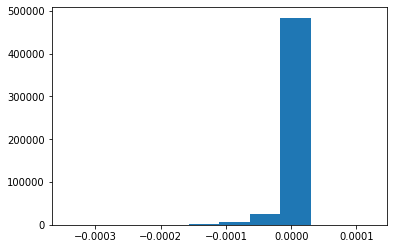

In [2]:
src = cv2.imread('./data/building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('./data/corner.png', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('./data/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
src_Gblur = cv2.GaussianBlur(src, (11,11), 0)


#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr() 
harris = cv2.cornerHarris(src_Gblur, 3, 3, 0.04) # 코너는 변화하는 구간(고주파 성분)에서 존재함 ..흑백이미지, 3 , 커널사이즈 
print(harris.dtype)
print(harris.shape)

print(np.min(harris)) #코너일 수있는 값
print(np.max(harris))

#히스토그램을 통해서 정규적으로 분포를 보자, 1차원 배열로 만들어야 함
plt.hist(harris.ravel())

uint8


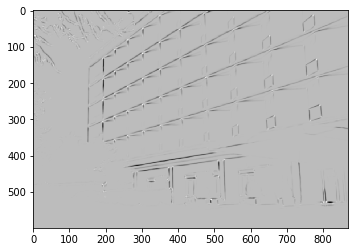

In [3]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) #내가 원하는 타입으로 바꿀수 있음, 
#0~255로 만들어 NORM_MINMAX(정규화) 시키라

print(harris_norm.dtype) #넘파이 타입
imshow('',harris_norm)

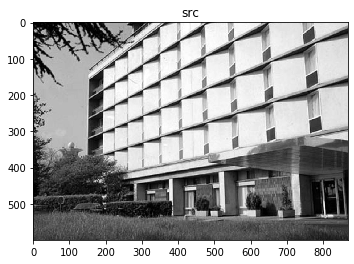

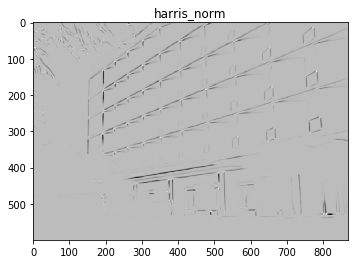

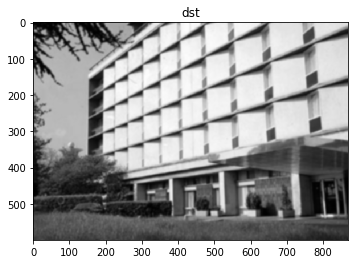

In [4]:
dst = cv2.cvtColor(src_Gblur, cv2.COLOR_GRAY2BGR)



# for y in range(harris_norm.shape[0]):
#         for x in range(harris_norm.shape[1]):
#             if harris_norm[y, x] > 200: #기준 값 보다 클 때
#                     cv2.circle(dst, (x, y), 5, (0, 0, 255), 2) # x,y에 반지름5로 동그라미를 그려라 빨간색(0, 0, 255)으로




imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

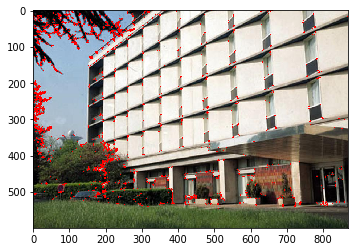

In [5]:
src = cv2.imread('./data/building.jpg') 
src_gray = cv2.imread('./data/building.jpg', cv2.IMREAD_GRAYSCALE)#그레이스케일은 0이다
#넘파이가 허용하는 표현
harris = cv2.cornerHarris(src_gray, 3, 3, 0.04)
src[harris>0.005*harris.max()] = [0,0,255]#0.01 곱하는건 10퍼센트 곱하는거, 즉 10퍼센트 정도보다 크면 색깔[0,0,255] 표시
imshow('',src)

92


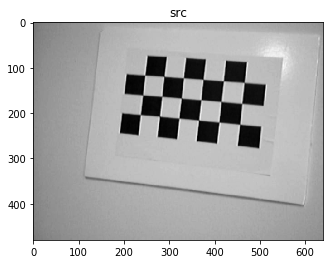

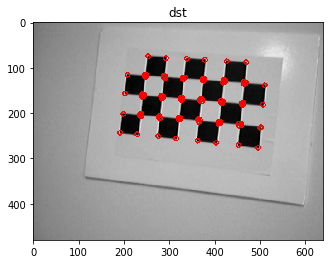

In [6]:
src = cv2.imread('./data/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)
print(len(keypoints))
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

92
(254.0, 75.0)


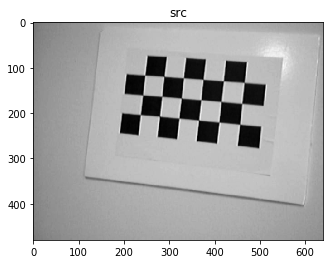

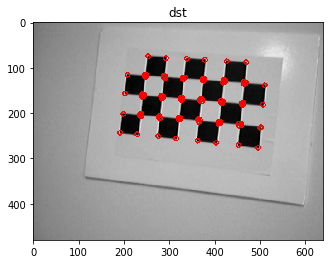

True

In [7]:
src = cv2.imread('./data/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)
print(len(keypoints))

print(keypoints[0].pt)
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]

x, y = keypoints[0].pt

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)
cv2.imwrite("out.png", dst)

(480, 640, 3)


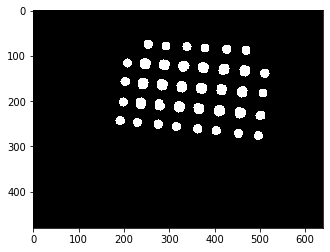

In [8]:
src = cv2.imread('./data/chessBoard.jpg')
mask = np.zeros(src.shape, dtype= 'uint8')
print(mask.shape)
keypoints = fast.detect(src)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 10, (255, 255, 255), -1)
        
imshow('', mask)

In [9]:
# 콘투어를 통해 필요한 점갯수 대로 찍기

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

src = cv2.imread('chessboard.jpg')
points = []
for con in contours :
    M = cv2.moments(con, True)
    #print(M)
    cx  = int(M['m10'] / M['m00'])
    cy  = int(M['m01'] / M['m00'])    
    cv2.circle(src, (cx,cy ), 10, (0,0, 255), 3)          
    points.append([cx, cy ])
imshow("", src)
print(points)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
